<a href="https://colab.research.google.com/github/Aditya19909/Machine-Learning/blob/main/Implementing__Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [ ]:
!pip install networkx==2.3

In [ ]:
pip install stellargraph

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [ ]:
from google.colab import files
uploaded = files.upload()
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

Saving movie_actor_network.csv to movie_actor_network.csv


In [ ]:
edges = [tuple(x) for x in data.values.tolist()] #convert data.csv to tupple (tupple are fixed)  

In [ ]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')    #B is graph movies is one node side and actor is another node side
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [ ]:
A = list(nx.connected_component_subgraphs(B))[0] #first connected component

In [ ]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


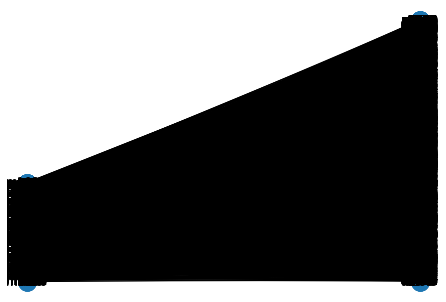

In [ ]:
l, r = nx.bipartite.sets(A) #Returns bipartite node sets of graph G.
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [ ]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies)) #putting movies nodes in movies list from graph A
print('number of actors ', len(actors)) #putting actor nodes in actor list from graph A

number of movies  1292
number of actors  3411


In [ ]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

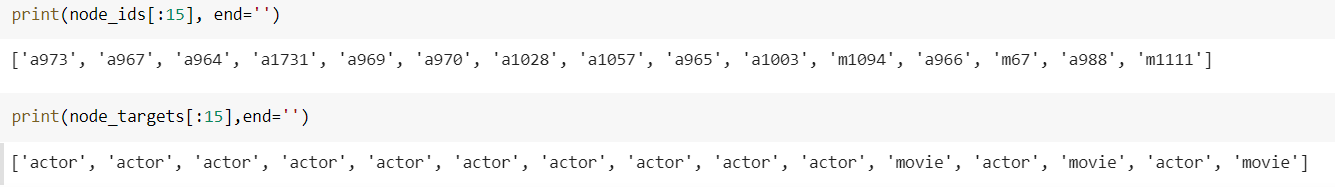

In [ ]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''   #reference-https://stackoverflow.com/questions/66636406/apply-clustering-algorithm-to-group-similar-actors
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    actor_embedding = [actor_embeddings.append(x) for i,x in enumerate(node_embeddings) if node_targets[i]=='actor']
    movie_embedding = [movie_embeddings.append(x) for i,x in enumerate(node_embeddings) if node_targets[i]=='movie']

    actor_node = [actor_nodes.append(x) for i,x in enumerate(node_ids) if node_targets[i]=='actor']
    movie_node = [movie_nodes.append(x) for i,x in enumerate(node_ids) if node_targets[i]=='movie']
    

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [ ]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [ ]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [ ]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    connected_lst = sorted(nx.connected_components(graph), key=len, reverse=True)
    connected_comp = graph.subgraph(connected_lst[0])
    sum=0
    N = number_of_clusters
    
    cost = len(connected_comp.nodes)/len(graph.nodes)# calculate cost1 
    sum+= cost

    cost1 = sum/N

    
    return cost1

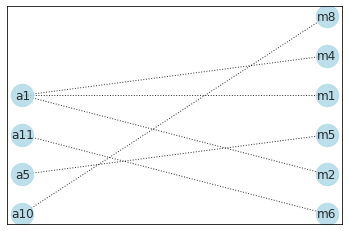

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [ ]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [ ]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost2'''
    degree = len(graph.edges)
    count=0
    for i in graph.nodes():
      if 'm' in i:
        count+=1
    unique_movie_nodes = count
    Cost = degree/unique_movie_nodes # calculate cost2
    cost2 = Cost/number_of_clusters
    
    
    return cost2

<font color='cyan'>Grader function - 4</font>

In [ ]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
        algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
        algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
        computer the metric Cost = Cost1*Cost2
    return number_of_clusters which have maximum Cost

<font color='blue'>Grouping similar actors</font>

In [ ]:
def create_subgraph_from_cluster(graph, cluster,nodes):   #reference-https://www.kaggle.com/code/chiragtagadiya/clustering-on-movies-and-actors/notebook
    SG = graph.__class__()
    filter_nodes= np.array(nodes)[cluster]
    SG.add_nodes_from(filter_nodes)
    SG.add_edges_from((n, nbr, d)
            for n, nbrs in graph.adj.items() if n in filter_nodes
            for nbr, d in nbrs.items())
    SG.graph.update(graph.graph)
    return SG

In [ ]:
from networkx.generators.ego import ego_graph
from operator import itemgetter
cost_dict={}
for number_of_clusters in [3,5, 10, 30, 50, 100, 200,500]: 
  total_cost1=0
  total_cost2=0
  algo = KMeans(n_clusters=number_of_clusters)
  algo.fit(actor_embeddings)
  labels=algo.labels_
  clusters = np.unique(labels)
  clusters_tsne_scale = pd.concat([pd.DataFrame({'embeddings':actor_embeddings}), pd.DataFrame({'tsne_clusters':labels})], axis=1)
  for i in clusters:
    sets = np.where(labels==i)
    G1= nx.Graph()
    for j in range(len(sets[0])):
      node=actor_nodes[j]
      G = ego_graph(A,n=node)
      G1.add_nodes_from(G.nodes) # adding nodes
      G1.add_edges_from(G.edges()) # adding edges 
    total_cost1 = total_cost1+ cost1(G1,number_of_clusters)
    total_cost2 = total_cost2+ cost2(G1,number_of_clusters)
  metric_cost= total_cost1*total_cost2
  cost_dict[number_of_clusters]=metric_cost

print(cost_dict)

{3: 4.751621329310232, 5: 3.8778469985181583, 10: 3.4236739726206644, 30: 2.6449699348016447, 50: 2.2711377221590787, 100: 2.0089322647019827, 200: 1.7406568700444465, 500: 1.4592116831950686}


In [ ]:
max_cost = max(cost_dict,key=cost_dict.get)
print("max cost  cluster is: ",max_cost)

max cost  cluster is:  3


<font color='blue'>Displaying similar actor clusters</font>

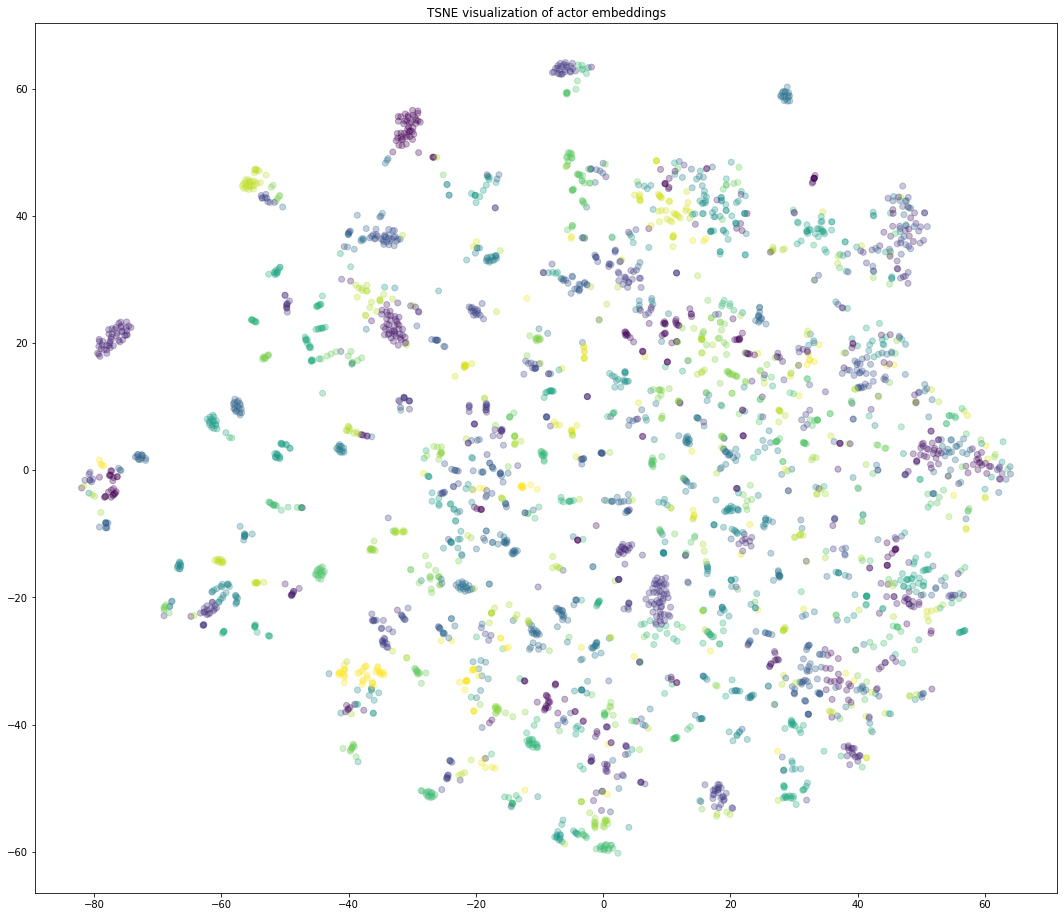

In [ ]:
#fitting with best parameter
from sklearn.manifold import TSNE
alog = KMeans(n_clusters=max_cost,random_state=42)
algo.fit(actor_embeddings)
actor_label = algo.labels_

import numpy as np
# draw the points
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_embeddings)


plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=actor_label, alpha=0.3)
plt.title('{} visualization of actor embeddings'.format(transform.__name__))

plt.show()




<font color='blue'>Grouping similar movies</font>

In [ ]:
from networkx.generators.ego import ego_graph
from operator import itemgetter
cost_dict={}
for number_of_clusters in [3,5, 10, 30, 50, 100, 200,500]: 
  total_cost1=0
  total_cost2=0
  algo = KMeans(n_clusters=number_of_clusters,init='k-means++',random_state=42)
  algo.fit(actor_embeddings)
  labels=algo.labels_
  clusters = np.unique(labels)
  clusters_tsne_scale = pd.concat([pd.DataFrame({'embeddings':actor_embeddings}), pd.DataFrame({'tsne_clusters':labels})], axis=1)
  for i in clusters:
    sets = np.where(labels==i)
    G1= nx.Graph()
    for j in range(len(sets[0])):
      node=actor_nodes[j]
      G = ego_graph(A,n=node)
      G1.add_nodes_from(G.nodes) # adding nodes
      G1.add_edges_from(G.edges()) # adding edges 
    total_cost1 = total_cost1+ cost1(G1,number_of_clusters)
    total_cost2 = total_cost2+ cost2(G1,number_of_clusters)
  metric_cost= total_cost1*total_cost2
  cost_dict[number_of_clusters]=metric_cost

print(cost_dict)

{3: 4.748756110670265, 5: 3.85978036145051, 10: 3.5284502642251723, 30: 2.760870217144035, 50: 2.297047938016181, 100: 1.9903225533325388, 200: 1.754103441281669, 500: 1.4712547554076791}


In [ ]:
max_cost_cluster = max(cost_dict,key=cost_dict.get)
print("max cost  cluster is: ",max_cost_cluster)

max cost  cluster is:  3


<font color='blue'>Displaying similar movie clusters</font>

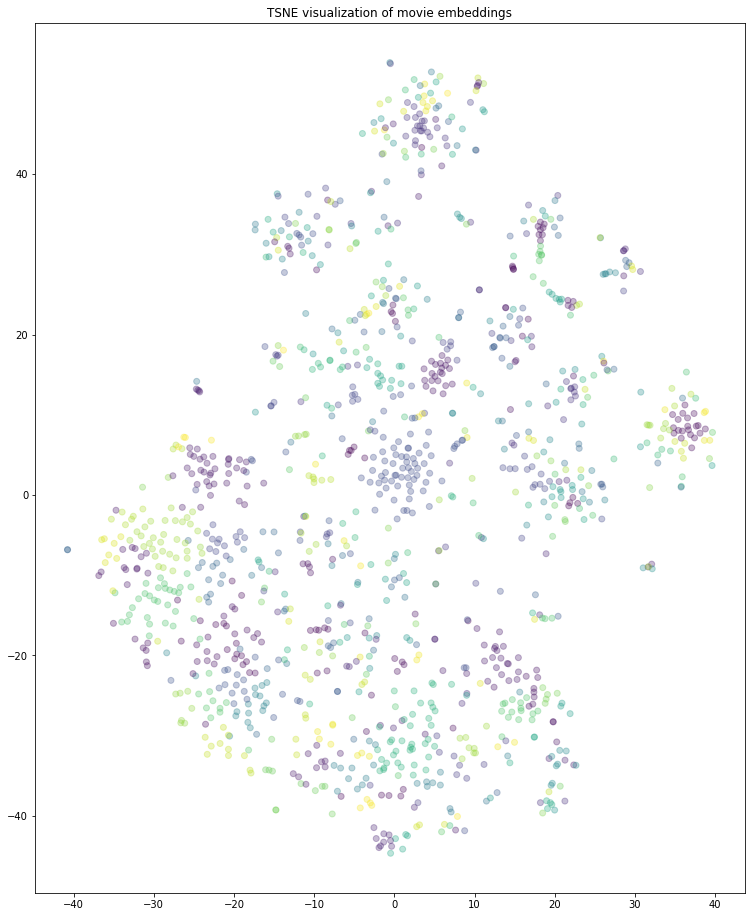

In [ ]:
#fitting with best parameter
from sklearn.manifold import TSNE
alog = KMeans(n_clusters=max_cost_cluster,init='k-means++',random_state=42)
algo.fit(movie_embeddings)
movie_label = algo.labels_

import numpy as np
# draw the points
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(movie_embeddings)



plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=movie_label, alpha=0.3)
plt.title('{} visualization of movie embeddings'.format(transform.__name__))

plt.show()

